Download dataset: www.kaggle.com/c/dogs-vs-cats/data

# Organizing splits

In [1]:
import os, shutil

original_dataset_dir = "kaggle_original_data"
base_dir = "cats_and_dogs_small"
os.mkdir(base_dir)

In [2]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [3]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [4]:
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [6]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [7]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [20]:
#copy the first 1000 cat images to train_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir,"train\\"+fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [22]:
#copy the next 500 cat images to validation_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir,"train\\"+fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [23]:
#copy the next 500 cat images to test_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir,"train\\"+fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [25]:
#copy the first 1000 dog images to train_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir,"train\\"+fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [26]:
#copy the next 500 dog images to validation_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir,"train\\"+fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [27]:
#copy the next 500 dog images to test_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir,"train\\"+fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [8]:
#sanity check, count number of pictures in each split
print(f"Total train cat images: {len(os.listdir(train_cats_dir))}")
print(f"Total train dog images: {len(os.listdir(train_dogs_dir))}")

print(f"Total validation cat images: {len(os.listdir(validation_cats_dir))}")
print(f"Total validation dog images: {len(os.listdir(validation_dogs_dir))}")

print(f"Total test cat images: {len(os.listdir(test_cats_dir))}")
print(f"Total test dog images: {len(os.listdir(test_dogs_dir))}")

Total train cat images: 1000
Total train dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


# Building Neural Network

In [35]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [37]:
#configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Data Preprocessing
Data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows: 
1. Read the picture files. 
2. Decode the JPEG content to RGB grids of pixels. 
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values)

Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files
on disk into batches of preprocessed tensors.

In [38]:
#using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

#rescale all images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), #resize all images to 150x150
    batch_size=20, class_mode='binary' #because we're using binay_crossentropy loss, we need binary labels
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150,150),
    batch_size=20, class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: 

(Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need
to break the iteration loop at some point)

In [39]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break #break after reading the first batch

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see
your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells
the process how many batches to draw from the validation generator for evaluation.

In [40]:
#fitting the model using a batch generator
history = model.fit_generator(
    train_generator, steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator, validation_steps=50
)

C:\Users\oo_wa\AppData\Local\Temp\ipykernel_14896\3956250271.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 52s 509ms/step - loss: 0.6898 - acc: 0.5345 - val_loss: 0.6720 - val_acc: 0.5740
Epoch 2/30
100/100 [==============================] - 42s 419ms/step - loss: 0.6536 - acc: 0.6235 - val_loss: 0.8636 - val_acc: 0.5010
Epoch 3/30
100/100 [==============================] - 47s 465ms/step - loss: 0.6226 - acc: 0.6450 - val_loss: 0.6074 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 56s 563ms/step - loss: 0.5714 - acc: 0.7010 - val_loss: 0.6009 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 46s 463ms/step - loss: 0.5352 - acc: 0.7280 - val_loss: 0.5741 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 47s 468ms/step - loss: 0.5075 - acc: 0.7480 - val_loss: 0.5712 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 48s 477ms/step - loss: 0.4816 - acc: 0.7650 - val_loss: 0.6051 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 4

It’s good practice to always save your models after training.

In [41]:
#saving the model
model.save('cats_and_dogs_small_1.h5')

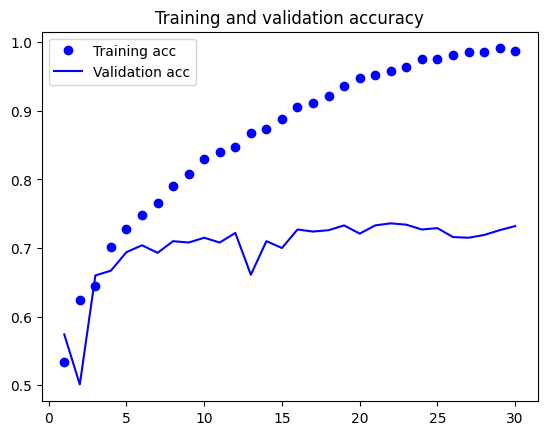

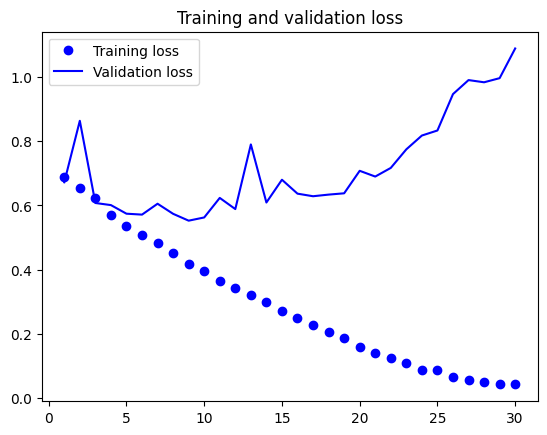

In [42]:
#diplaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0. 

Because you have relatively few training samples (2,000), overfitting will be your
number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally
when processing images with deep-learning models: data augmentation.

# Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. 

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better. 

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance. Let’s get
started with an example

In [43]:
#setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             fill_mode='nearest')

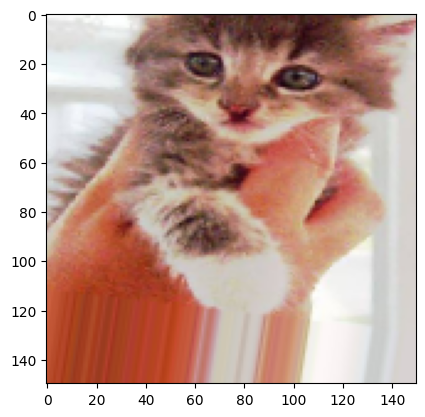

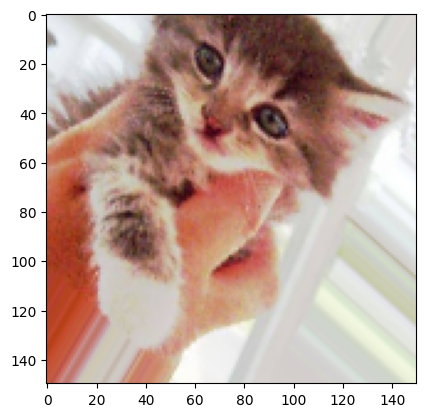

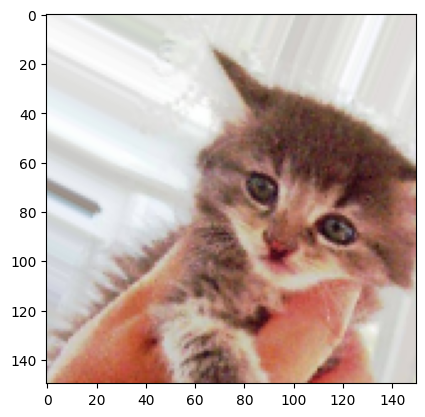

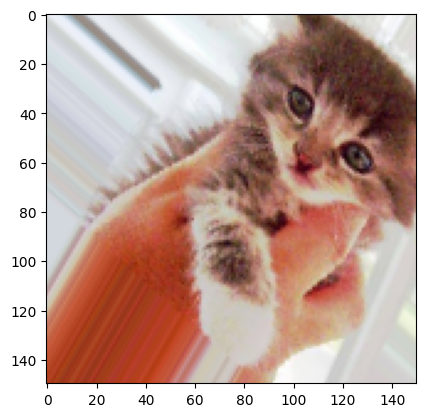

In [51]:
#display som randomly augmented training images
import keras.utils as image

#from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

#choose one image to augment
img_path = fnames[3]

#read the image and resize it
img= image.load_img(img_path, target_size=(150, 150))

#covert the image to numpy array
x = image.img_to_array(img)

#reshape the image to (1,150,150,3)
x = x.reshape((1,)+x.shape)

batches=datagen.flow(x, batch_size=1)

i=0
for batch in batches:
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

You can build a new neural network with dropout and use augmentation on training data and train the neural network on the augmented data.

In [17]:
from keras import models, layers
from keras import optimizers


model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Flatten()) 

model.add(layers.Dropout(0.5)) 

model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory( validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=32,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
#calculate steps_per_epoch
batch_size = 32
total_train_samples = 1000
steps_per_epoch = total_train_samples // batch_size
steps_per_epoch

31

In [21]:
history = model.fit_generator( train_generator, 
                              steps_per_epoch=62, 
                              epochs=100, 
                              validation_data=validation_generator,
                              validation_steps=31)

C:\Users\oo_wa\AppData\Local\Temp\ipykernel_16432\2229952530.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator( train_generator,


Epoch 1/100
62/62 [==============================] - 59s 962ms/step - loss: 0.6894 - acc: 0.5315 - val_loss: 0.6797 - val_acc: 0.5867
Epoch 2/100
62/62 [==============================] - 59s 948ms/step - loss: 0.6811 - acc: 0.5670 - val_loss: 0.6657 - val_acc: 0.6028
Epoch 3/100
62/62 [==============================] - 60s 976ms/step - loss: 0.6749 - acc: 0.5757 - val_loss: 0.6535 - val_acc: 0.6129
Epoch 4/100
62/62 [==============================] - 55s 881ms/step - loss: 0.6668 - acc: 0.5991 - val_loss: 0.6422 - val_acc: 0.6361
Epoch 5/100
62/62 [==============================] - 53s 840ms/step - loss: 0.6538 - acc: 0.6143 - val_loss: 0.6325 - val_acc: 0.6411
Epoch 6/100
62/62 [==============================] - 54s 876ms/step - loss: 0.6458 - acc: 0.6164 - val_loss: 0.6283 - val_acc: 0.6351
Epoch 7/100
62/62 [==============================] - 54s 866ms/step - loss: 0.6290 - acc: 0.6494 - val_loss: 0.6008 - val_acc: 0.6603
Epoch 8/100
62/62 [==============================] - 57s 926ms

62/62 [==============================] - 94s 2s/step - loss: 0.4608 - acc: 0.7800 - val_loss: 0.4625 - val_acc: 0.7863
Epoch 63/100
62/62 [==============================] - 92s 1s/step - loss: 0.4730 - acc: 0.7718 - val_loss: 0.4259 - val_acc: 0.7994
Epoch 64/100
62/62 [==============================] - 93s 1s/step - loss: 0.4625 - acc: 0.7754 - val_loss: 0.4847 - val_acc: 0.7742
Epoch 65/100
62/62 [==============================] - 93s 2s/step - loss: 0.4495 - acc: 0.7846 - val_loss: 0.5696 - val_acc: 0.7218
Epoch 66/100
62/62 [==============================] - 49s 768ms/step - loss: 0.4563 - acc: 0.7820 - val_loss: 0.4694 - val_acc: 0.7752
Epoch 67/100
62/62 [==============================] - 42s 682ms/step - loss: 0.4635 - acc: 0.7851 - val_loss: 0.4372 - val_acc: 0.8065
Epoch 68/100
62/62 [==============================] - 41s 666ms/step - loss: 0.4637 - acc: 0.7749 - val_loss: 0.5043 - val_acc: 0.7329
Epoch 69/100
62/62 [==============================] - 58s 931ms/step - loss: 0.4

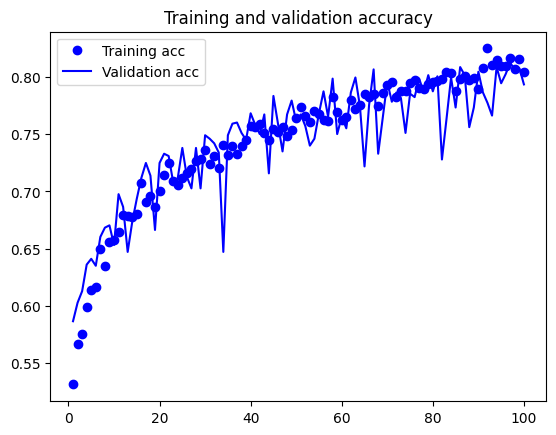

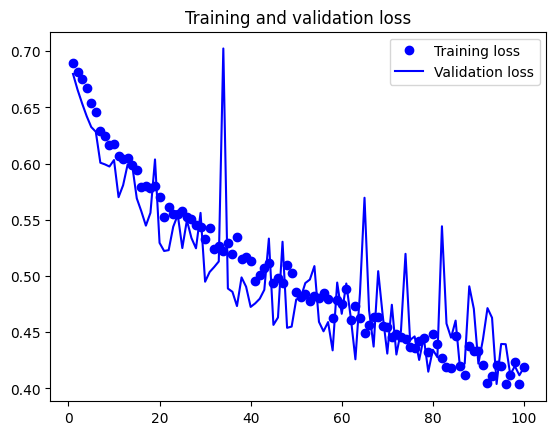

In [22]:
#diplaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()